## Import Packages

In [1]:
import torch  # PyTorch package
import torchvision  # load datasets
import torchvision.transforms as transforms  # transform data
import torch.nn as nn  # basic building block for neural networks
import torch.nn.functional as F  # import convolution functions like ReLU
import torch.optim as optim  # optimizer
import numpy as np  # for numpy operations
import matplotlib.pyplot as plt  # for plotting
import time  # for timing the training process

## Check if CUDA is available and use it; otherwise, use CPU and Transform to normalize the images

In [2]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor object
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # mean = 0.5, std = 0.5
])


## Load training data

In [3]:
import torchvision
import torchvision.transforms as transforms
import torch

# Set batch size and number of workers
batch_size = 4
num_workers = 2

# Define a transform for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizing for grayscale images
])

# Load training data
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=num_workers)

# Load test data
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=num_workers)


## Classes in FashionMNIST

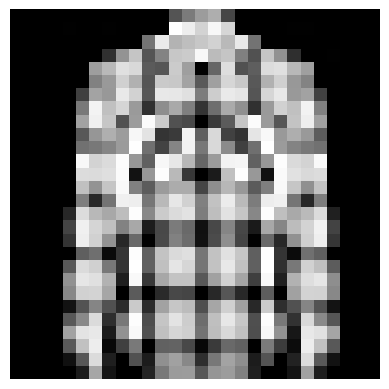

Label: Shirt


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the classes for FashionMNIST
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

def imshow(img):
    '''Function to show image'''
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()  # Convert to numpy array
    plt.imshow(npimg[0], cmap='gray')  # Display the single channel image
    plt.axis('off')  # Hide axis
    plt.show()

# Example usage:
# Get a batch of training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show the first image in the batch
imshow(images[0])
print(f'Label: {classes[labels[0]]}')


## Get random training images with iter function

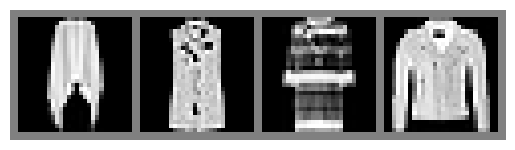

Coat Shirt Coat Coat


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

# Assuming you've already defined the trainloader and imshow function

# Iterate through the training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Call function on our images
imshow(torchvision.utils.make_grid(images))

# Print the class of the images
print(' '.join('%s' % classes[labels[j]] for j in range(batch_size)))

class Net(nn.Module):
    '''Models a simple Convolutional Neural Network'''
    def __init__(self):
        '''Initialize the network'''
        super(Net, self).__init__()
        # 1 input image channel (grayscale), 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        # Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Calculate the output size after convolution and pooling
        # After conv1: size (28-5+1)=24 -> pool: 24/2=12
        # After conv2: size (12-5+1)=8 -> pool: 8/2=4
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # 4x4 from image dimension after pooling
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        '''The forward propagation algorithm'''
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)  # Adjust based on the new output size
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the network
net = Net()

# You can now proceed with the rest of your training code


In [6]:
net = Net().to(device)  # Move the model to the selected device
print(net)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Timing the training process
start_time = time.time()


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## Training loop

In [7]:

for epoch in range(2):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to the selected device
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 minibatches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0


[1,  2000] loss: 1.416
[1,  4000] loss: 0.656
[1,  6000] loss: 0.548
[1,  8000] loss: 0.512
[1, 10000] loss: 0.475
[1, 12000] loss: 0.447
[1, 14000] loss: 0.418
[2,  2000] loss: 0.394
[2,  4000] loss: 0.378
[2,  6000] loss: 0.361
[2,  8000] loss: 0.361
[2, 10000] loss: 0.354
[2, 12000] loss: 0.364
[2, 14000] loss: 0.345


## Calculate training time

In [12]:

end_time = time.time()
print('Finished Training')
print('Training time (seconds):', end_time - start_time)

# Test the network
dataiter = iter(testloader)
images, labels = next(dataiter)  # Corrected this line

# Move test images to the selected device
images, labels = images.to(device), labels.to(device)


Finished Training
Training time (seconds): 448.3223533630371
